IMPORTAR LIBRERIAS

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer


# Configuración de estilo
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

CARGAR DATASET

In [5]:
df = pd.read_csv("student_habits_performance.csv")

# Vista general
print("Dimensiones:", df.shape)
print("\nTipos de variables:")
print(df.dtypes)

df.head()

Dimensiones: (1000, 16)

Tipos de variables:
student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


REVISION DE VALORES FALTANTES

In [4]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

faltantes = pd.DataFrame({
    "Valores faltantes": missing,
    "Porcentaje": missing_percent
}).sort_values(by="Porcentaje", ascending=False)

faltantes


,Valores faltantes,Porcentaje
parental_education_level,91,9.1
student_id,0,0.0
gender,0,0.0
age,0,0.0
social_media_hours,0,0.0
netflix_hours,0,0.0
part_time_job,0,0.0
study_hours_per_day,0,0.0
attendance_percentage,0,0.0
sleep_hours,0,0.0


DETECCION DE VALORES ATIPICOS

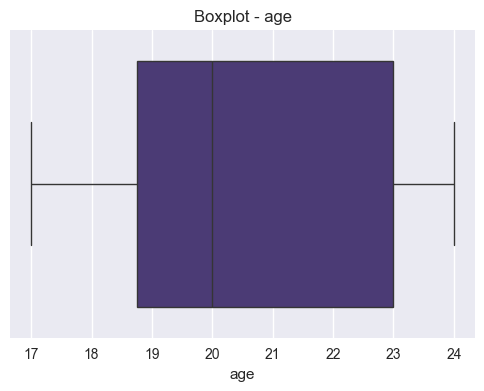

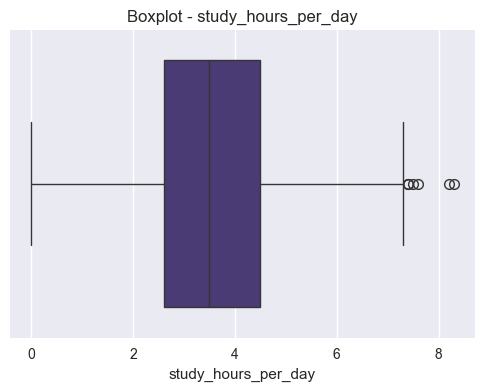

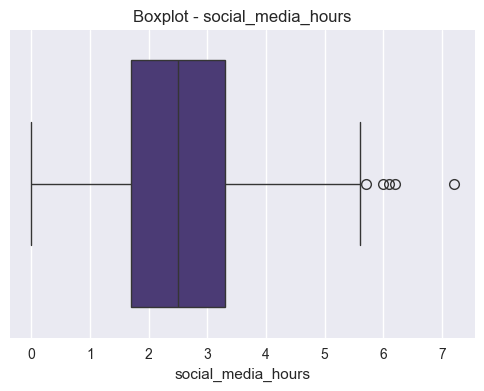

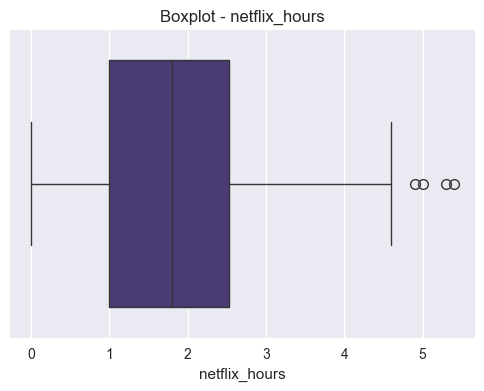

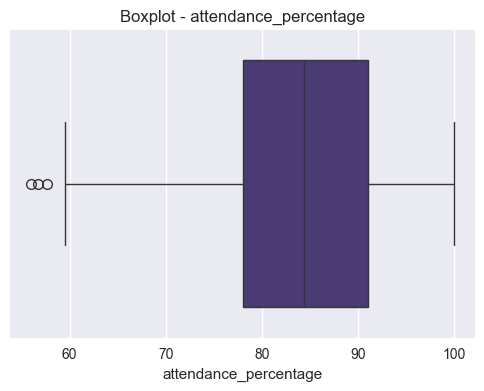

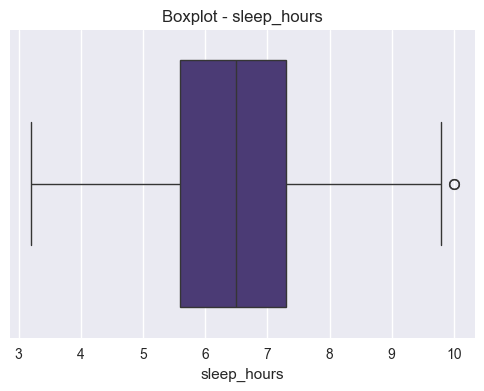

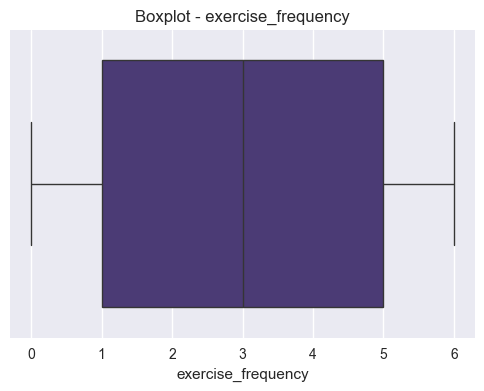

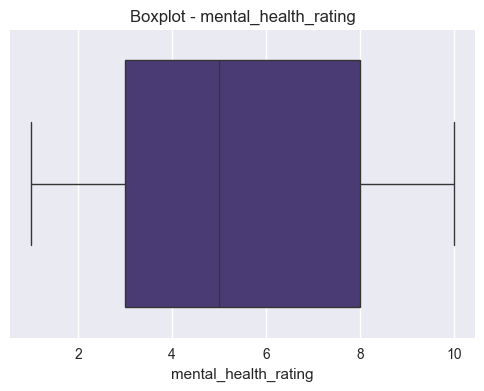

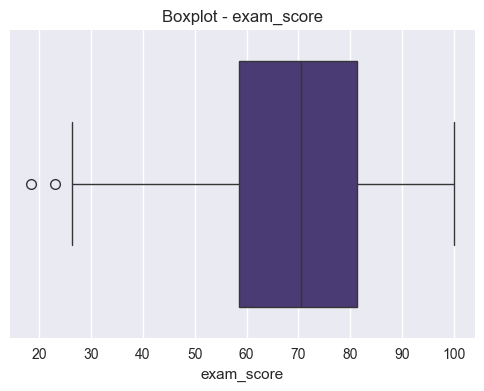

Número de outliers detectados por variable (Z-score > 3):
 [0 2 3 2 0 0 0 0 1]


In [6]:
# Usando Boxplots
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

# Usando Z-Score para detectar outliers
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).sum(axis=0)  # cuantos outliers por variable
print("Número de outliers detectados por variable (Z-score > 3):\n", outliers)

ANALISIS DE DISTRIBUCIONES

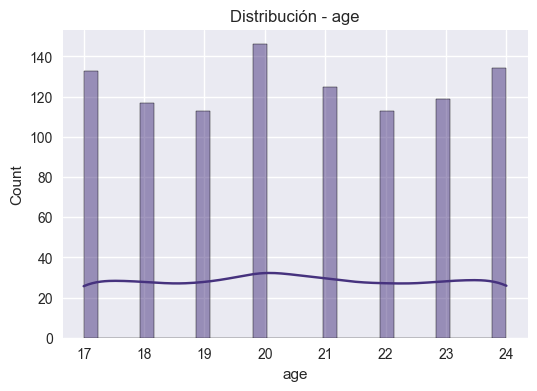

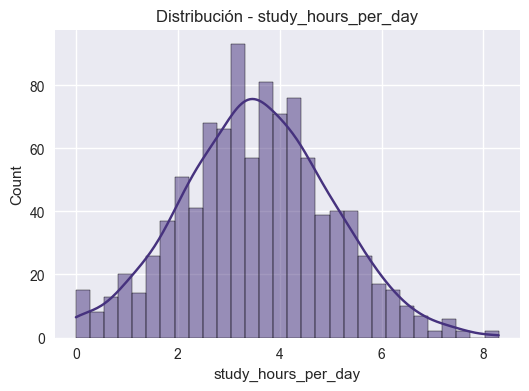

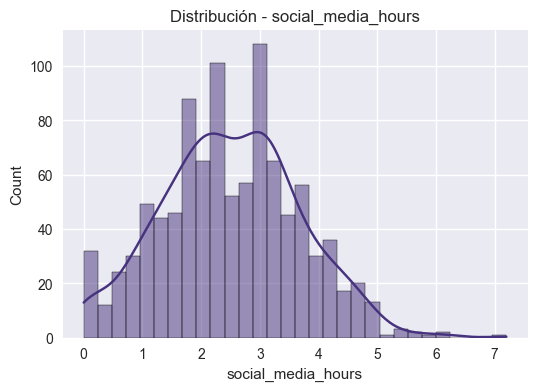

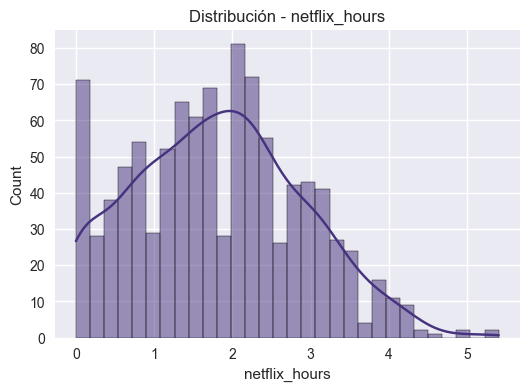

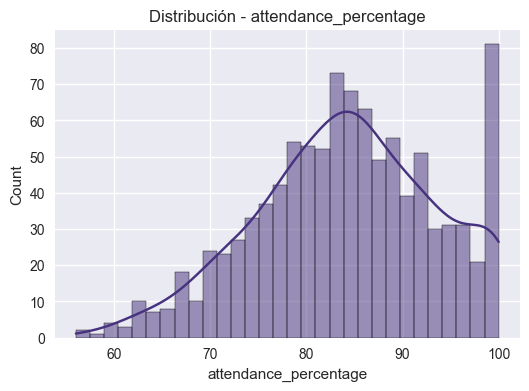

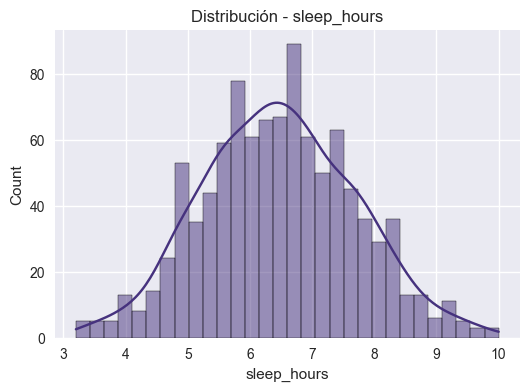

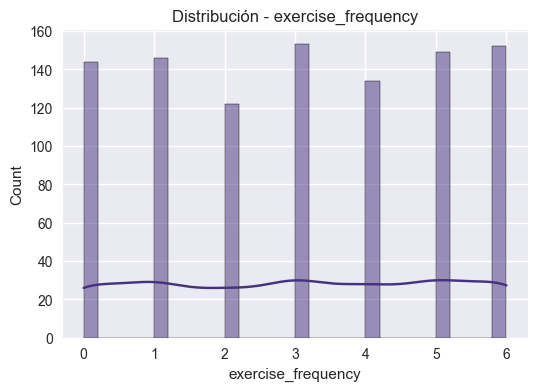

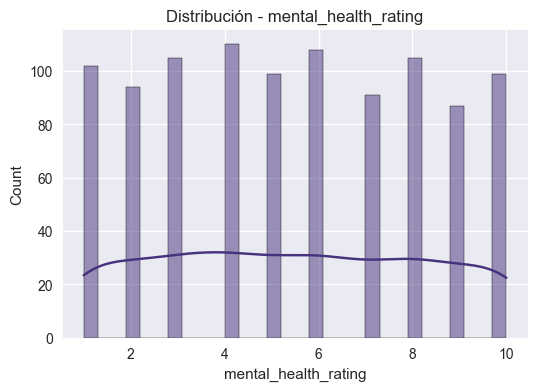

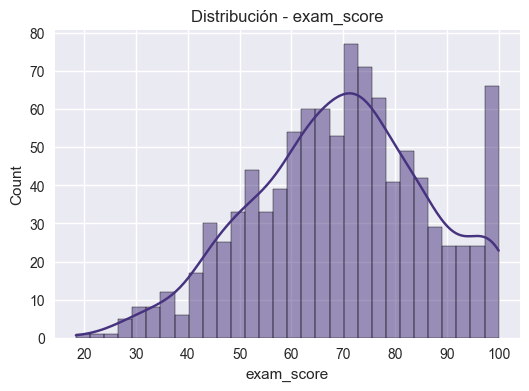

In [7]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución - {col}")
    plt.show()


ANALISIS UNIVARIADO

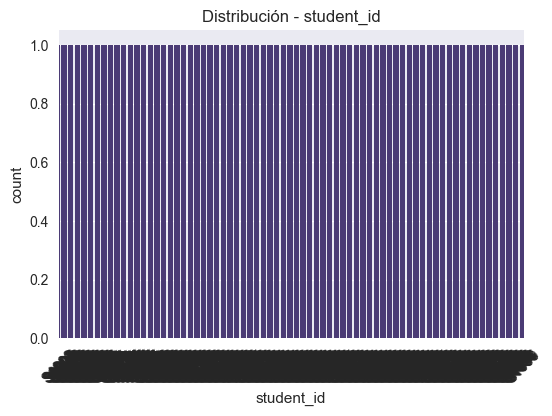

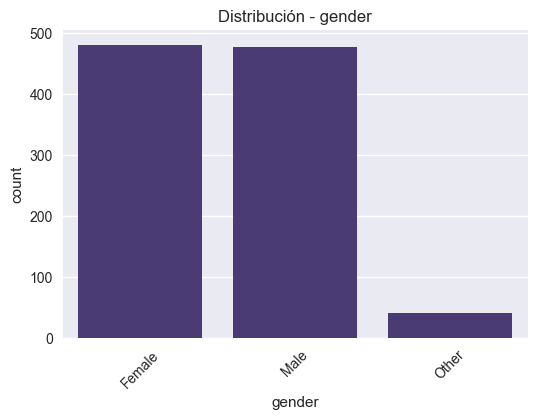

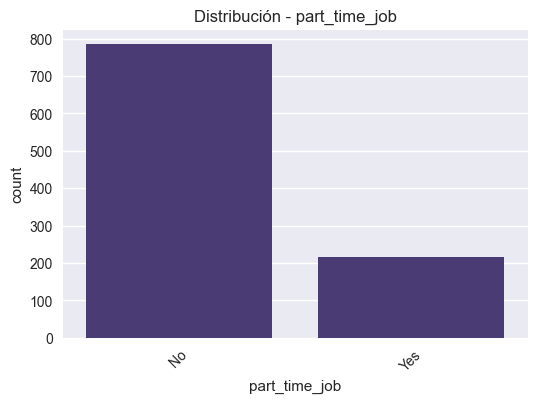

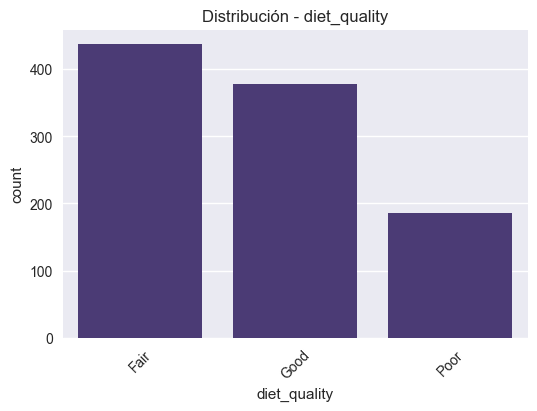

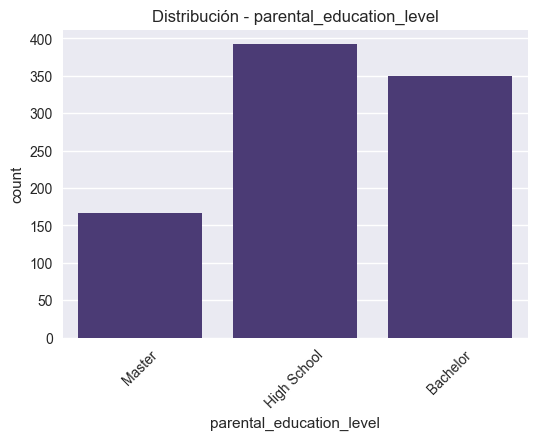

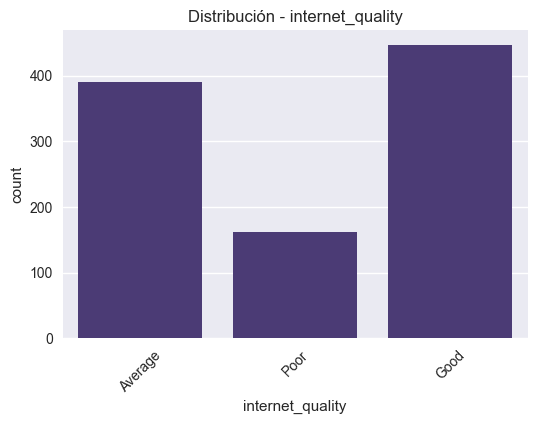

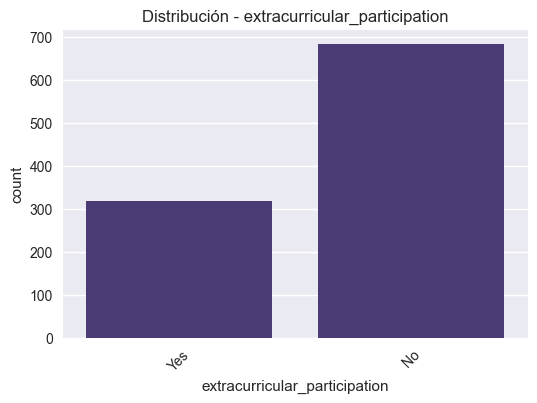

In [8]:
# Estadísticos descriptivos
desc = df[numeric_cols].describe().T
desc["skewness"] = df[numeric_cols].skew()  # sesgo
desc["kurtosis"] = df[numeric_cols].kurt()  # curtosis
desc

# Variables categóricas
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribución - {col}")
    plt.xticks(rotation=45)
    plt.show()

ANALISIS MULTIVARIADO

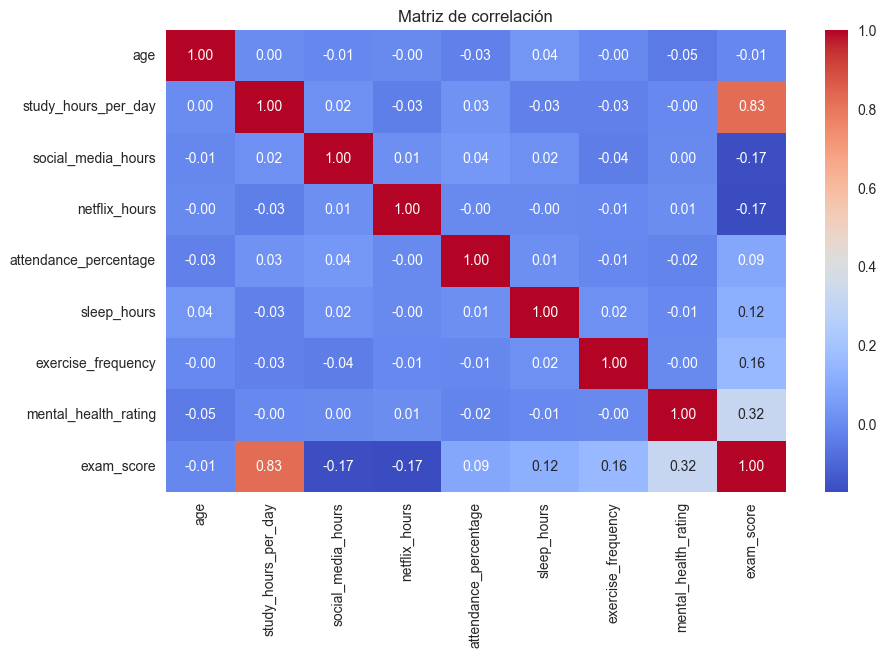

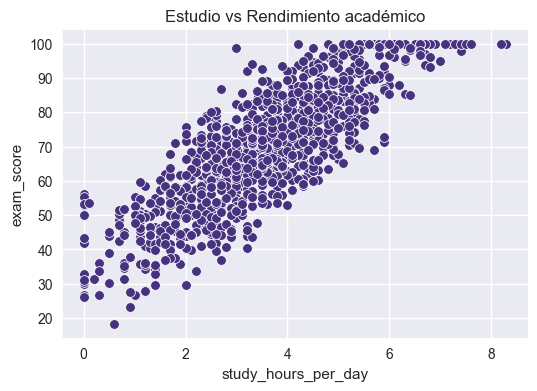

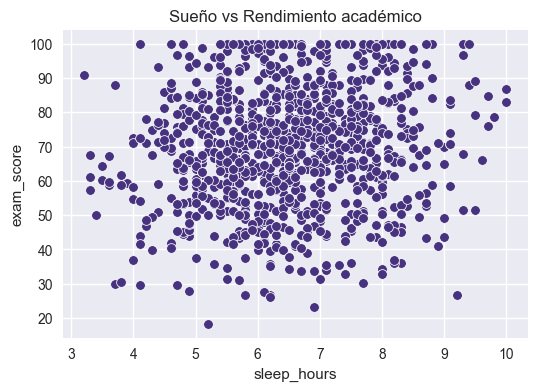

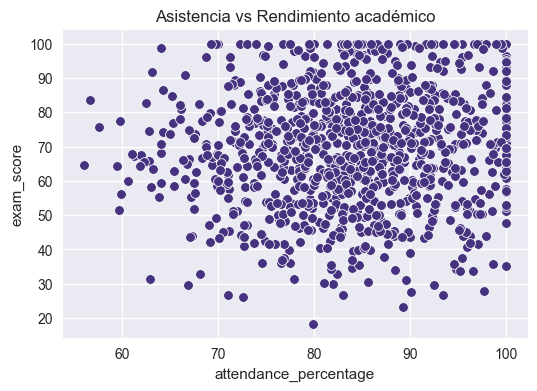

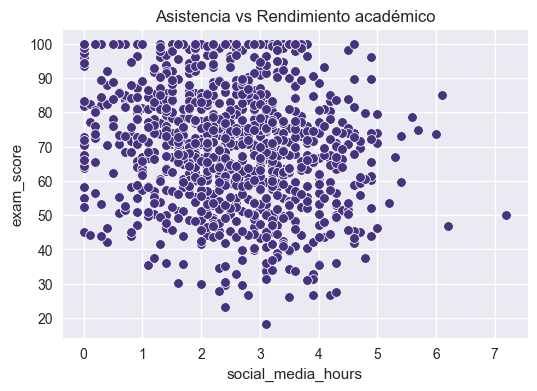

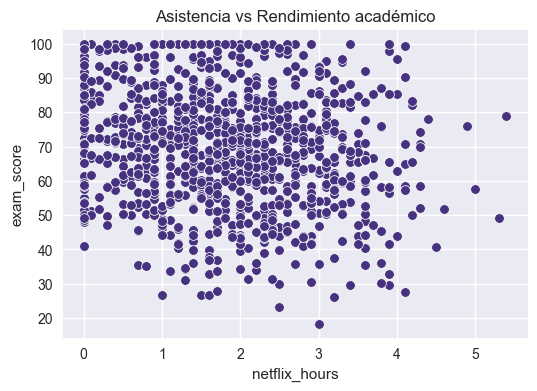

aprobado,No,Sí
gender,,
Female,28.274428,71.725572
Male,27.882600,72.117400
Other,26.190476,73.809524


In [9]:
# Correlación entre numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Relaciones con exam_score
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="study_hours_per_day", y="exam_score")
plt.title("Estudio vs Rendimiento académico")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="sleep_hours", y="exam_score")
plt.title("Sueño vs Rendimiento académico")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="attendance_percentage", y="exam_score")
plt.title("Asistencia vs Rendimiento académico")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="social_media_hours", y="exam_score")
plt.title("Asistencia vs Rendimiento académico")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="netflix_hours", y="exam_score")
plt.title("Asistencia vs Rendimiento académico")
plt.show()


# Tablas cruzadas: género vs aprobado/suspenso
df["aprobado"] = df["exam_score"].apply(lambda x: "Sí" if x >= 60 else "No")
pd.crosstab(df["gender"], df["aprobado"], normalize="index") * 100


PAIRPLOT

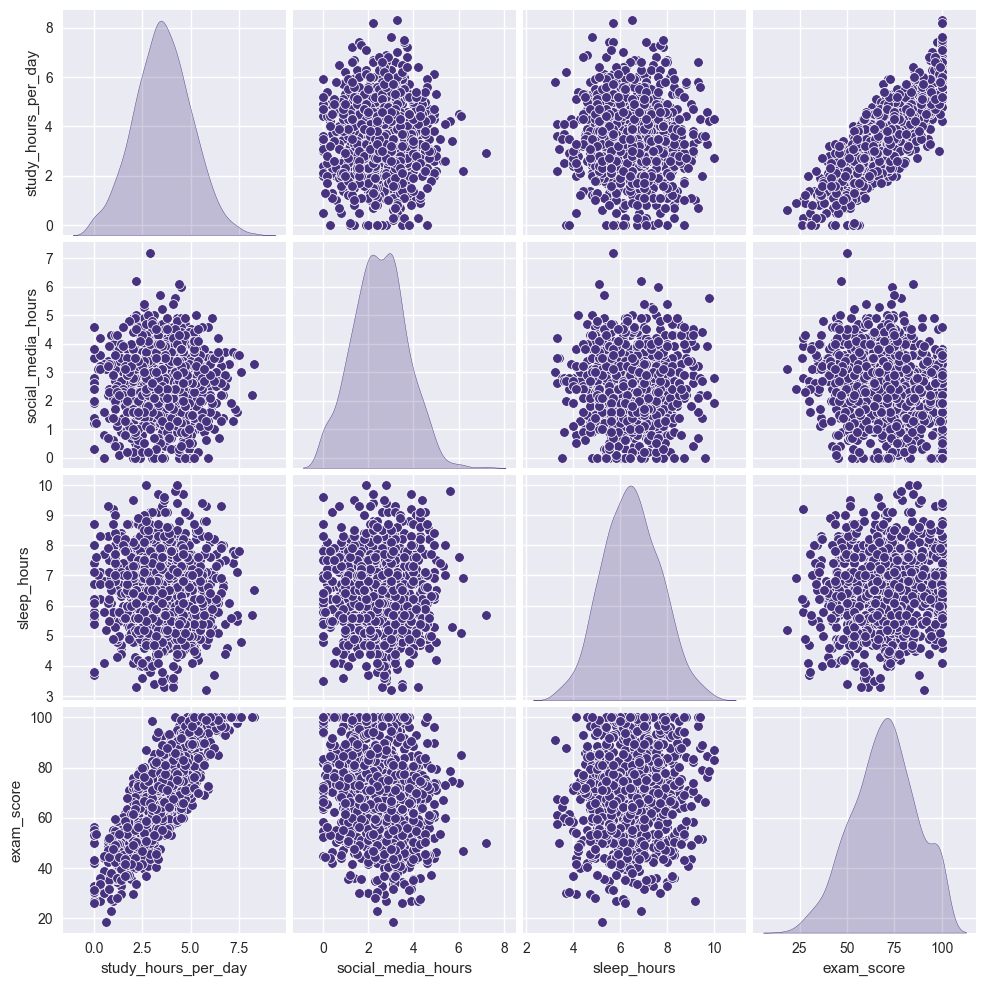

In [10]:
sns.pairplot(df[["study_hours_per_day","social_media_hours","sleep_hours","exam_score"]], diag_kind="kde")
plt.show()

Hipotesis Iniciales

Los Estudiantes con trabajo a tiempo parcial tienen, en promeio, puntajes de examen mas bajos.

Mas horas de estudio por dia se asocias positivamente con exam_score

Mas horas en redes Sociales o Netflix se asocian negativamente con exam_score

Mayor asistencia y mayor nivel educativo de los padres se asocian con mejores exam_score

La perticipacion extracurriculas puede relacionarse con el desempeño

INSIGHTS INICIALES

In [6]:
print("Promedio de nota según si trabaja o no:")
print(df.groupby("part_time_job")["exam_score"].mean())

print("\nPromedio de nota según calidad de dieta:")
print(df.groupby("diet_quality")["exam_score"].mean())

print("\nPromedio de nota según calidad de internet:")
print(df.groupby("internet_quality")["exam_score"].mean())

print("\nPromedio de nota según nivel educativo de los padres:")
print(df.groupby("parental_education_level")["exam_score"].mean())

print("\nPromedio de nota según participación extracurricular:")
print(df.groupby("extracurricular_participation")["exam_score"].mean())

Promedio de nota según si trabaja o no:
part_time_job
No     69.836561
Yes    68.743256
Name: exam_score, dtype: float64

Promedio de nota según calidad de dieta:
diet_quality
Fair    70.428833
Good    69.366402
Poor    68.127568
Name: exam_score, dtype: float64

Promedio de nota según calidad de internet:
internet_quality
Average    70.643990
Good       68.647651
Poor       69.717284
Name: exam_score, dtype: float64

Promedio de nota según nivel educativo de los padres:
parental_education_level
Bachelor       70.272571
High School    69.547194
Master         68.086826
Name: exam_score, dtype: float64

Promedio de nota según participación extracurricular:
extracurricular_participation
No     69.591349
Yes    69.623270
Name: exam_score, dtype: float64
